<a href="https://colab.research.google.com/github/tandat-1305/Data-Analysis-with-Python/blob/main/Movie_Recommender_System/Content_based_recommendation_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [37]:
netflix_data=pd.read_csv("https://raw.githubusercontent.com/tandat-1305/Data-Analysis-with-Python/main/Movie_Recommender_System/netflix_titles.csv")
netflix_data.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


In [38]:
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [39]:
netflix_shows=netflix_data[netflix_data['type']=='TV Show']
netflix_movies=netflix_data[netflix_data['type']=='Movie']

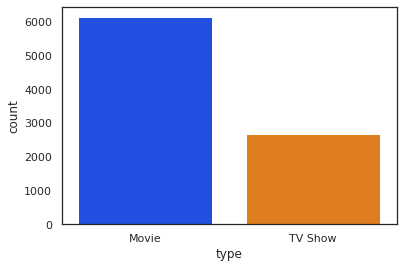

In [40]:
sns.set(style="white")
ax = sns.countplot(x="type", data=netflix_data, palette="bright")

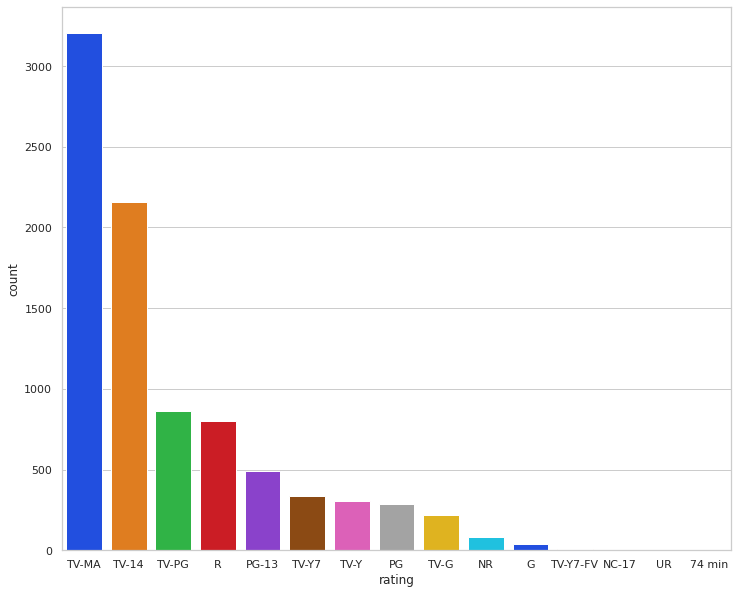

In [41]:
plt.figure(figsize=(12,10))
sns.set(style="whitegrid")
ax = sns.countplot(x="rating", data=netflix_data, palette="bright", order=netflix_data['rating'].value_counts().index[0:15])

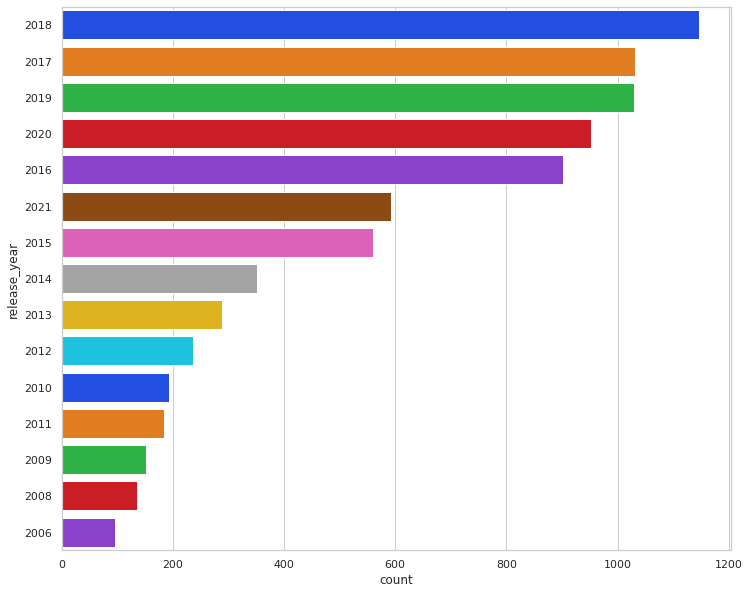

In [42]:
plt.figure(figsize=(12,10))
sns.set(style="whitegrid")
ax = sns.countplot(y="release_year", data=netflix_data, palette="bright", order=netflix_data['release_year'].value_counts().index[0:15])

**Biểu đồ này cho thấy hầu hết các nội dung được sản xuất vào năm 2017, 2018 và 2019. Thực tế thú vị là trong các năm 2020 và 2021 số lượng nội dung được sản xuất thấp. Điều này chủ yếu là do đại dịch Covid-19**

# **RECOMMENDATION SYSTEM**

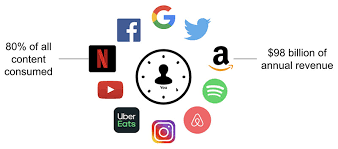
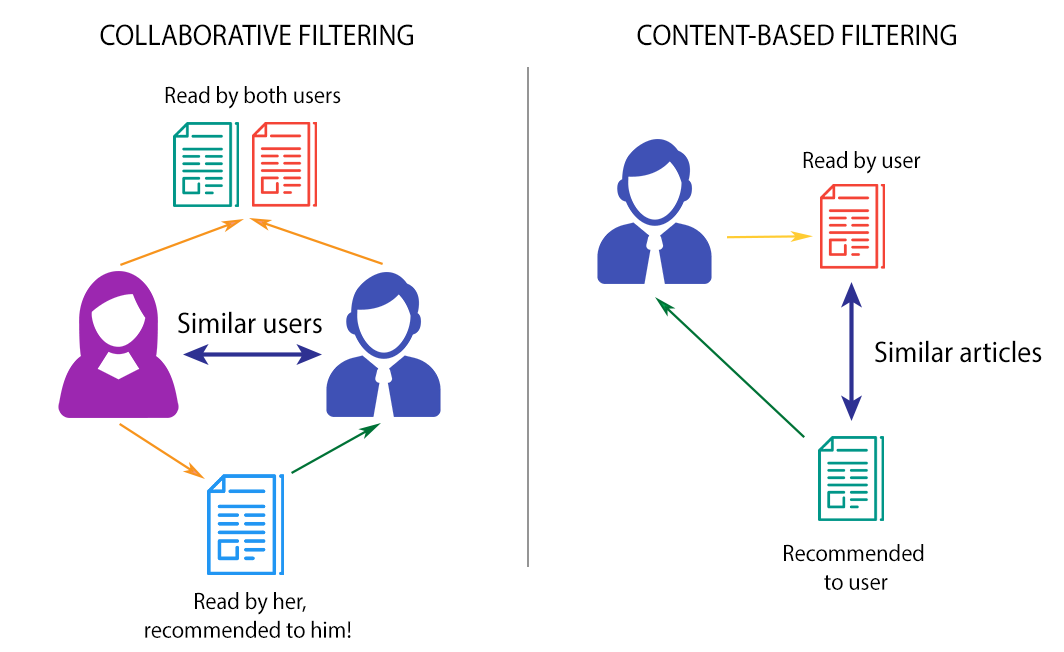

**Điểm TF-IDF (Tần suất tài liệu nghịch đảo thuật ngữ (TF-IDF)) là tần suất xuất hiện của một từ trong tài liệu, được giảm trọng số theo số lượng tài liệu xuất hiện trong đó. Điều này được thực hiện để giảm tầm quan trọng của các từ xuất hiện thường xuyên trong tổng quan cốt truyện và do đó, tầm quan trọng của chúng trong việc tính toán điểm tương tự cuối cùng.**

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english')
netflix_data['description'] = netflix_data['description'].fillna('')
tfidf_matrix = tfidf.fit_transform(netflix_data['description'])
tfidf_matrix.shape

(8807, 18895)

**Điểm tương tự Cosine được sử dụng vì nó không phụ thuộc vào độ lớn và tương đối dễ dàng và nhanh chóng để tính toán**
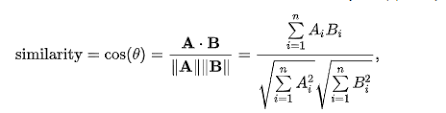


**Độ tương tự cosine là thước đo độ giống nhau, thường được sử dụng để đo độ tương tự của tài liệu trong phân tích văn bản.**

In [44]:
from sklearn.metrics.pairwise import linear_kernel
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [45]:
indices = pd.Series(netflix_data.index, index=netflix_data['title']).drop_duplicates()

**Xác định chức năng hệ thống khuyến nghị**

In [46]:
def get_recommendations(title, cosine_sim=cosine_sim):
      # Lấy chỉ số của phim phù hợp với tiêu đề
    idx = indices[title]
        # Nhận điểm số tương đồng theo từng cặp của tất cả các phim có phim đó
    sim_scores = list(enumerate(cosine_sim[idx]))
        # Sắp xếp phim dựa trên điểm số tương tự
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
        # Nhận điểm của 10 bộ phim giống nhau nhất
    sim_scores = sim_scores[1:11]
        # Nhận chỉ số phim
    movie_indices = [i[0] for i in sim_scores]
        # Trở lại top 10 phim tương tự nhất
    return netflix_data['title'].iloc[movie_indices]

**Tại thời điểm này, chức năng hệ thống khuyến nghị của chúng tôi đã sẵn sàng để sử dụng. Sau khi xác định chức năng hệ thống đề xuất của chúng tôi, chúng tôi có thể sử dụng nó để nhận các đề xuất. Tất cả những gì chúng ta cần làm là chuyển tên nội dung làm đối số**

In [47]:
get_recommendations('Peaky Blinders')

7683                    Our Godfather
2646                   My Stupid Boss
3133                              Don
8293                         The Fear
7140    Jonathan Strange & Mr Norrell
7785                Power Rangers Zeo
8467                       The Prison
8539                       The Tudors
1510                    The Con Is On
8391     The Legend of Michael Mishra
Name: title, dtype: object

In [48]:
get_recommendations('Dark')

2874                   Altered Carbon
4629                           Maniac
1034                       Synchronic
626     Sophie: A Murder in West Cork
1117         Ibrahim a Fate to Define
4101                        Candyflip
4253       Black Mirror: Bandersnatch
869                  Who Killed Sara?
2979                     THE STRANGER
7348                        Love Rain
Name: title, dtype: object

**Có thể thấy rằng mô hình hoạt động tốt, nhưng không chính xác lắm. Do đó, cần nhiều chỉ số hơn được thêm vào mô hình để cải thiện hiệu suất**

# **LỌC NỘI DUNG TRÊN NHIỀU CHỈ SỐ (CONTENT BASED FILTERING ON MULTIPLE METRICS)**

**Lọc nội dung dựa trên các yếu tố sau: Chức danh Đạo diễn diễn viên được liệt kê trong cốt truyện**



In [49]:
#Điền các giá trị rỗng bằng chuỗi trống
filledna=netflix_data.fillna('')

#Làm sạch dữ liệu - làm cho tất cả các từ viết thường
def clean_data(x):
        return str.lower(x.replace(" ", ""))

#Xác định các đặc điểm mà mô hình sẽ được lọc
# Phân tích cú pháp các tính năng được xâu chuỗi thành các đối tượng python tương ứng của chúng
features=['title','director','cast','listed_in','description']
filledna=filledna[features]
for feature in features:
    filledna[feature] = filledna[feature].apply(clean_data)
    
filledna.head(8)

,title,director,cast,listed_in,description
0,dickjohnsonisdead,kirstenjohnson,,documentaries,"asherfathernearstheendofhislife,filmmakerkirst..."
1,blood&water,,"amaqamata,khosingema,gailmabalane,thabangmolab...","internationaltvshows,tvdramas,tvmysteries","aftercrossingpathsataparty,acapetownteensetsou..."
2,ganglands,julienleclercq,"samibouajila,tracygotoas,samueljouy,nabihaakka...","crimetvshows,internationaltvshows,tvaction&adv...","toprotecthisfamilyfromapowerfuldruglord,skille..."
3,jailbirdsneworleans,,,"docuseries,realitytv","feuds,flirtationsandtoilettalkgodownamongthein..."
4,kotafactory,,"mayurmore,jitendrakumar,ranjanraj,alamkhan,ahs...","internationaltvshows,romantictvshows,tvcomedies",inacityofcoachingcentersknowntotrainindia’sfin...
5,midnightmass,mikeflanagan,"katesiegel,zachgilford,hamishlinklater,henryth...","tvdramas,tvhorror,tvmysteries",thearrivalofacharismaticyoungpriestbringsglori...
6,mylittlepony:anewgeneration,"robertcullen,joséluisucha","vanessahudgens,kimikoglenn,jamesmarsden,sofiac...",children&familymovies,equestria'sdivided.butabright-eyedherobelieves...
7,sankofa,hailegerima,"kofighanaba,oyafunmikeogunlano,alexandraduah,n...","dramas,independentmovies,internationalmovies","onaphotoshootinghana,anamericanmodelslipsbacki..."


In [50]:
# Tạo siêu dữ liệu

def create_soup(x):
    return x['title']+ ' ' + x['director'] + ' ' + x['cast'] + ' ' +x['listed_in']+' '+ x['description']

In [51]:
filledna['soup'] = filledna.apply(create_soup, axis=1)

**Bây giờ mã về cơ bản tương tự như mô hình trên ngoại trừ thực tế là bộ đếm vectơ được sử dụng thay vì tf-idf, Chuyển đổi một tập hợp các tài liệu văn bản thành một ma trận số lượng mã thông báo.**

In [52]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
# Nhập CountVectorizer và tạo ma trận đếm

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(filledna['soup'])

#Tính toán ma trận Tương tự Cosine dựa trên count_matrix
cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

In [53]:
filledna=filledna.reset_index()
indices = pd.Series(filledna.index, index=filledna['title'])

In [54]:
# Chức năng lấy tiêu đề phim làm đầu vào và đầu ra hầu hết các phim tương tự

def get_recommendations_new(title, cosine_sim=cosine_sim):
    title=title.replace(' ','').lower()
        # Lấy chỉ số của phim phù hợp với tiêu đề
    idx = indices[title]
        # Nhận điểm số tương đồng theo từng cặp của tất cả các phim có phim đó
    sim_scores = list(enumerate(cosine_sim[idx]))
        # Sắp xếp phim dựa trên điểm số tương tự
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
        # Nhận điểm của 10 bộ phim giống nhau nhất
    sim_scores = sim_scores[1:11]
        # Nhận chỉ số phim
    movie_indices = [i[0] for i in sim_scores]
        # Trở lại top 10 phim tương tự nhất
    return netflix_data['title'].iloc[movie_indices]

In [55]:
get_recommendations_new('Dark', cosine_sim2)

260                 The Defeated
3604                    Sintonia
2053             Young Wallander
3744                     Unit 42
5404           The Truth Seekers
6323                 Black Heart
3789              Killer Ratings
4476       Terrorism Close Calls
4673    Inside the Criminal Mind
3855                  The Writer
Name: title, dtype: object

In [56]:
get_recommendations_new('Black Mirror', cosine_sim2)

3045                                       Dracula
3551           The Dark Crystal: Age of Resistance
4262                                Watership Down
1301                               Behind Her Eyes
7017    How to Live Mortgage Free with Sarah Beeny
2979                                  THE STRANGER
5365                                         Vexed
69                  Stories by Rabindranath Tagore
1056                                Ajaibnya Cinta
1603                                  Alien Worlds
Name: title, dtype: object